# EDA: Time Series Price Data (Forecasting)
## Dataset: enhanced_iphone_pricing_analysis_deduplicated.csv

**Purpose:** Understand price and rating data BEFORE building Chronos & Prophet forecasting models

**Data Period:** September 2024 - November 2025

---

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported")

✓ Libraries imported


## 1. Load YOUR Actual Data

In [18]:
import pandas as pd

# Use the FULL PATH from Desktop
df = pd.read_csv(r'C:\Users\vvdva\Desktop\infosys-competitor-tracker\enhanced_iphone_pricing_analysis_deduplicated.csv')

# Convert date column
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

print(f"✓ Loaded: {len(df)} rows")
print(f"✓ Date range: {df['date'].min()} to {df['date'].max()}")
print(f"✓ Duration: {(df['date'].max() - df['date'].min()).days} days")
print(f"✓ Columns: {list(df.columns)}")
print(f"\n✓ First 5 rows:")
print(df.head())


✓ Loaded: 302 rows
✓ Date range: 2024-09-01 00:00:00 to 2025-11-22 00:00:00
✓ Duration: 447 days
✓ Columns: ['date', 'product_name', 'current_price', 'original_price', 'discount_price', 'rating', 'year', 'month', 'quarter', 'day_of_week', 'is_weekend', 'day_of_year', 'price_change', 'price_change_pct', 'days_since_last_change', 'discount_percentage']

✓ First 5 rows:
        date     product_name  current_price  original_price  discount_price  \
0 2024-09-01  Apple iPhone 14          57999           59900         57999.0   
1 2024-09-02  Apple iPhone 14          57999           59900         57999.0   
2 2024-09-03  Apple iPhone 14          57999           59900         57999.0   
3 2024-09-04  Apple iPhone 14          57999           59900         57999.0   
4 2024-09-05  Apple iPhone 14          57999           59900         57999.0   

   rating  year  month  quarter  day_of_week  is_weekend  day_of_year  \
0     4.6  2024      9        3            6           1          245   
1  

In [19]:
# First 10 rows
print("\n📊 First 10 rows:")
df.head(10)


📊 First 10 rows:


,date,product_name,current_price,original_price,discount_price,rating,year,month,quarter,day_of_week,is_weekend,day_of_year,price_change,price_change_pct,days_since_last_change,discount_percentage
0,2024-09-01,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,6,1,245,0,0.0,1,3.17
1,2024-09-02,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,0,0,246,0,0.0,1,3.17
2,2024-09-03,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,1,0,247,0,0.0,1,3.17
3,2024-09-04,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,2,0,248,0,0.0,1,3.17
4,2024-09-05,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,3,0,249,0,0.0,1,3.17
5,2024-09-06,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,4,0,250,0,0.0,0,3.17
6,2024-09-07,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,5,1,251,0,0.0,1,3.17
7,2024-09-08,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,6,1,252,0,0.0,1,3.17
8,2024-09-09,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,0,0,253,0,0.0,1,3.17
9,2024-09-10,Apple iPhone 14,57999,59900,57999.0,4.6,2024,9,3,1,0,254,0,0.0,1,3.17


In [20]:
# Dataset info
print("\n📋 Dataset Info:")
df.info()


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    302 non-null    datetime64[ns]
 1   product_name            302 non-null    object        
 2   current_price           302 non-null    int64         
 3   original_price          302 non-null    int64         
 4   discount_price          203 non-null    float64       
 5   rating                  302 non-null    float64       
 6   year                    302 non-null    int64         
 7   month                   302 non-null    int64         
 8   quarter                 302 non-null    int64         
 9   day_of_week             302 non-null    int64         
 10  is_weekend              302 non-null    int64         
 11  day_of_year             302 non-null    int64         
 12  price_change            302 non-n

In [21]:
# Statistical summary
print("\n📈 Statistical Summary:")
df.describe()


📈 Statistical Summary:


,date,current_price,original_price,discount_price,rating,year,month,quarter,day_of_week,is_weekend,day_of_year,price_change,price_change_pct,days_since_last_change,discount_percentage
count,302,302.000000,302.0,203.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,2025-02-07 16:27:01.192052992,57304.688742,59900.0,51368.551724,4.593046,2024.596026,6.642384,2.536424,2.950331,0.274834,186.357616,-3.311258,-0.003709,0.986755,4.384470
min,2024-09-01 00:00:00,54900.000000,59900.0,5000.000000,4.200000,2024.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-4901.000000,-8.180000,0.000000,0.000000
25%,2024-11-15 06:00:00,54999.000000,59900.0,54999.000000,4.600000,2024.000000,3.000000,1.000000,1.000000,0.000000,76.250000,0.000000,0.000000,1.000000,0.000000
50%,2025-01-29 12:00:00,57999.000000,59900.0,54999.000000,4.600000,2025.000000,5.500000,2.000000,3.000000,0.000000,151.500000,0.000000,0.000000,1.000000,3.170000
75%,2025-04-14 18:00:00,59900.000000,59900.0,57999.000000,4.600000,2025.000000,11.000000,4.000000,5.000000,1.000000,308.750000,0.000000,0.000000,1.000000,8.180000
max,2025-11-22 00:00:00,59900.000000,59900.0,57999.000000,4.700000,2025.000000,12.000000,4.000000,6.000000,1.000000,366.000000,2000.000000,3.780000,1.000000,11.700000
std,NaN,2165.613127,0.0,15001.902292,0.039742,0.491507,3.924274,1.258987,1.983533,0.447172,119.914025,324.166658,0.552719,0.114512,3.698775


In [22]:
# Missing values check
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing'] > 0])

if missing.sum() == 0:
    print("✓ No missing values!")
else:
    print(f"⚠ Total missing: {missing.sum()}")


🔍 Missing Values:
                Missing  Percentage
discount_price       99   32.781457
⚠ Total missing: 99


## 2. UNIVARIATE ANALYSIS
**Analyze each variable individually**

### 2.1 Price Distribution

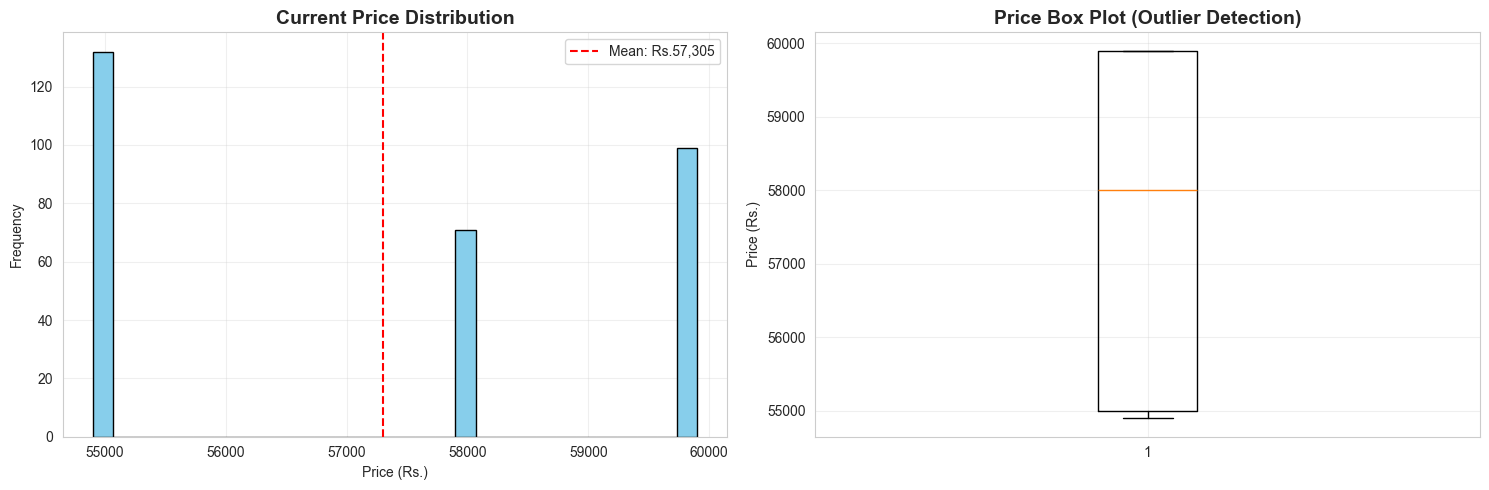


📊 Price Statistics:
  Mean: Rs.57,304.69
  Median: Rs.57,999.00
  Std Dev: Rs.2,165.61
  Min: Rs.54,900.00
  Max: Rs.59,900.00
  Range: Rs.5,000.00


In [23]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['current_price'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Current Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (Rs.)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['current_price'].mean(), color='red', linestyle='--', 
                label=f'Mean: Rs.{df["current_price"].mean():,.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['current_price'].dropna(), vert=True)
axes[1].set_title('Price Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price (Rs.)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Price Statistics:")
print(f"  Mean: Rs.{df['current_price'].mean():,.2f}")
print(f"  Median: Rs.{df['current_price'].median():,.2f}")
print(f"  Std Dev: Rs.{df['current_price'].std():,.2f}")
print(f"  Min: Rs.{df['current_price'].min():,.2f}")
print(f"  Max: Rs.{df['current_price'].max():,.2f}")
print(f"  Range: Rs.{df['current_price'].max() - df['current_price'].min():,.2f}")

In [ ]:
WHAT I SEE:
3 price clusters:
    Low: ~Rs.55,000 (120 days)
    Mid: ~Rs.58,000 (70 days)
    High: ~Rs.60,000 (100 days)

Key numbers:
    Mean: Rs.57,305
    Range: Rs.54,900 - Rs.59,900 (Rs.5,000 range)
    Std Dev: Rs.2,166 (moderate volatility)
    
INFERENCE:
    Price distribution shows 3 distinct clusters at Rs.55k, Rs.58k, and Rs.60k, indicating discrete pricing strategy rather than continuous changes.
    Standard deviation of Rs.2,166 shows moderate volatility, justifying need for forecasting.

### 2.2 Rating Distribution

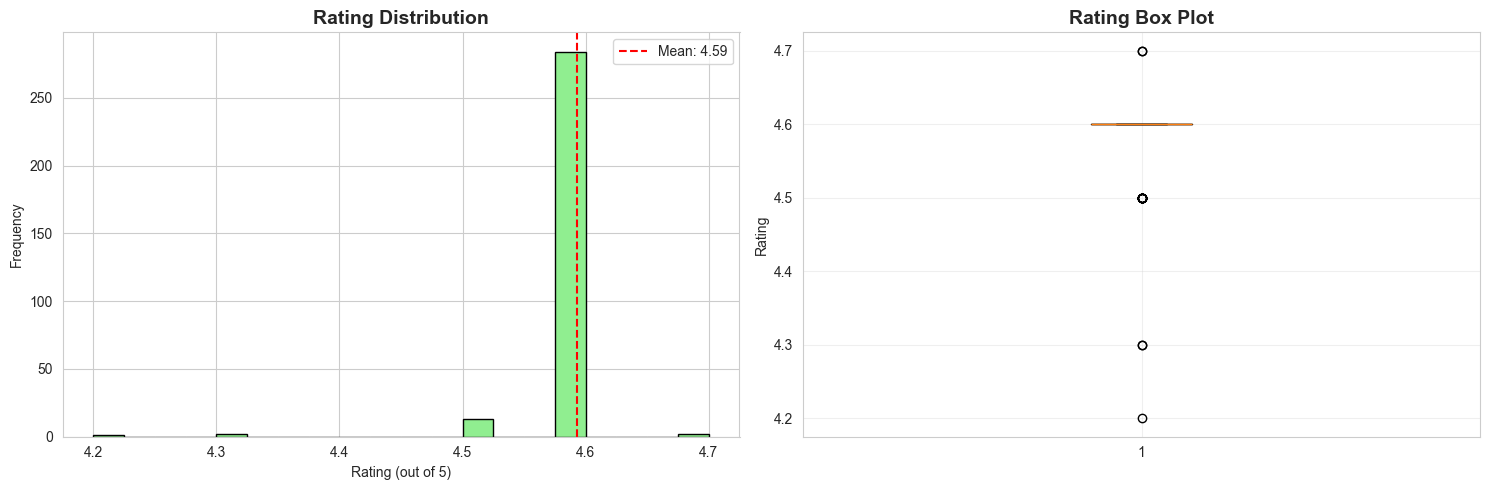


⭐ Rating Statistics:
  Mean: 4.59/5.0
  Median: 4.60/5.0
  Std Dev: 0.040
  Min: 4.2
  Max: 4.7


In [24]:
# Rating distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['rating'], bins=20, color='lightgreen', edgecolor='black')
axes[0].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating (out of 5)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['rating'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["rating"].mean():.2f}')
axes[0].legend()

axes[1].boxplot(df['rating'].dropna(), vert=True)
axes[1].set_title('Rating Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rating')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n⭐ Rating Statistics:")
print(f"  Mean: {df['rating'].mean():.2f}/5.0")
print(f"  Median: {df['rating'].median():.2f}/5.0")
print(f"  Std Dev: {df['rating'].std():.3f}")
print(f"  Min: {df['rating'].min():.1f}")
print(f"  Max: {df['rating'].max():.1f}")

In [ ]:
What I see:
    Most ratings clustered at 4.6(From the Rating Box Plot)
    Tiny spread (4.2 - 4.7)
    Range: 4.2 - 4.7 (only 0.5 range!)

INFERENCE:
    Customer satisfaction is EXTREMELY stable. Ratings barely change - product quality is consistent

### 2.3 Discount Percentage

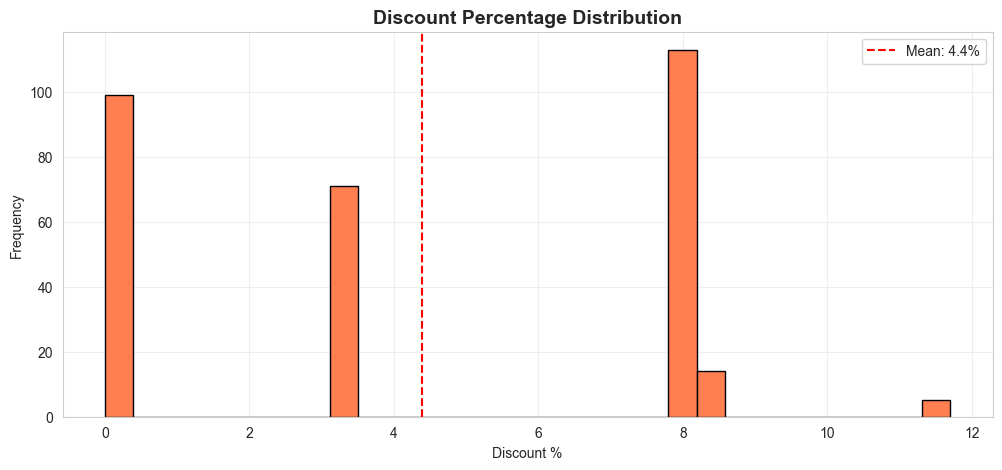


💰 Discount Statistics:
  Mean: 4.38%
  Max: 11.70%
  Min: 0.00%


In [25]:
# Discount analysis
plt.figure(figsize=(12, 5))
plt.hist(df['discount_percentage'].dropna(), bins=30, color='coral', edgecolor='black')
plt.title('Discount Percentage Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Discount %')
plt.ylabel('Frequency')
plt.axvline(df['discount_percentage'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["discount_percentage"].mean():.1f}%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n💰 Discount Statistics:")
print(f"  Mean: {df['discount_percentage'].mean():.2f}%")
print(f"  Max: {df['discount_percentage'].max():.2f}%")
print(f"  Min: {df['discount_percentage'].min():.2f}%")

In [ ]:
What I see:
3 discount levels:
    No discount: 0% (~100 days)
    Small discount: ~4% (~70 days)
    Big discount: ~8-12% (~120 days)

INFERENCE:
   Discount distribution shows strategic pricing with three tiers: 0%, ~4%, and ~8-12%. Maximum discount of 11.7% likely corresponds to festival sales.
Mean of 4.38% indicates modest average discounting strategy.

## 3. BIVARIATE ANALYSIS
**Relationships between variables**

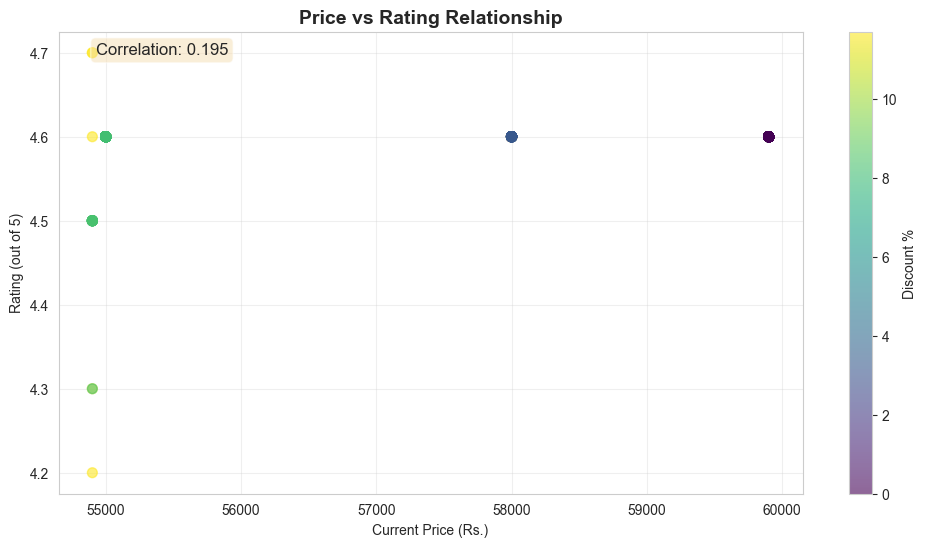


🔗 Price-Rating Correlation: 0.195
  → Weak correlation (price doesn't strongly affect rating)


In [26]:
# Price vs Rating correlation
plt.figure(figsize=(12, 6))
plt.scatter(df['current_price'], df['rating'], alpha=0.6, 
            c=df['discount_percentage'].fillna(0), cmap='viridis', s=50)
plt.colorbar(label='Discount %')
plt.title('Price vs Rating Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Current Price (Rs.)')
plt.ylabel('Rating (out of 5)')
plt.grid(True, alpha=0.3)

correlation = df['current_price'].corr(df['rating'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

print(f"\n🔗 Price-Rating Correlation: {correlation:.3f}")
if abs(correlation) < 0.3:
    print("  → Weak correlation (price doesn't strongly affect rating)")
elif abs(correlation) < 0.7:
    print("  → Moderate correlation")
else:
    print("  → Strong correlation")

In [ ]:
What I see:

    Correlation: 0.195 (weak, almost no relationship)
    Dots scattered randomly - no clear pattern
    Low price doesn't mean low rating
    High price doesn't mean high rating

INFERENCE:
    Since the correlation is 0.195, which means there is almost no correlation.
And,Thus inorder to know what exactly affects their Rating/Satisfaction, I need to do EDA on their TEXT based reviews which I have used for sentiment analysis.

## 4. TIME SERIES ANALYSIS ⭐
**THIS IS CRITICAL - Why we chose Chronos & Prophet!**

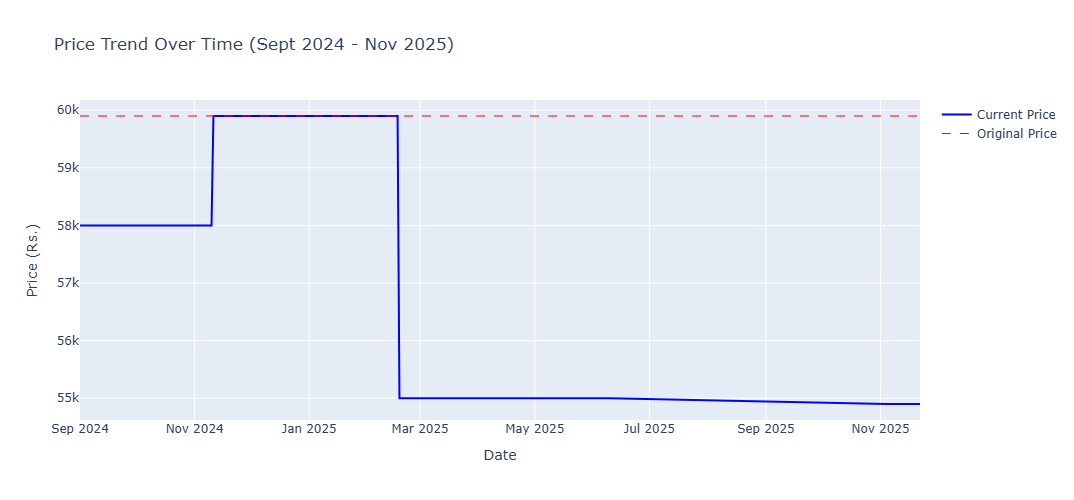


📉 Price Trend:
  Start Price: Rs.57,999
  End Price: Rs.54,900
  Change: Rs.-3,099 (-5.34%)
  Highest: Rs.59,900
  Lowest: Rs.54,900


In [27]:
# Price over time
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['current_price'],
    mode='lines',
    name='Current Price',
    line=dict(color='blue', width=2)
))

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['original_price'],
    mode='lines',
    name='Original Price',
    line=dict(color='red', width=1, dash='dash')
))

fig.update_layout(
    title='Price Trend Over Time (Sept 2024 - Nov 2025)',
    xaxis_title='Date',
    yaxis_title='Price (Rs.)',
    hovermode='x unified',
    height=500
)

fig.show()

# Calculate overall trend
price_start = df['current_price'].iloc[0]
price_end = df['current_price'].iloc[-1]
price_change_pct = ((price_end - price_start) / price_start) * 100

print(f"\n📉 Price Trend:")
print(f"  Start Price: Rs.{price_start:,.0f}")
print(f"  End Price: Rs.{price_end:,.0f}")
print(f"  Change: Rs.{price_end - price_start:,.0f} ({price_change_pct:+.2f}%)")
print(f"  Highest: Rs.{df['current_price'].max():,.0f}")
print(f"  Lowest: Rs.{df['current_price'].min():,.0f}")

In [ ]:
What I see:
    Step function (sudden jumps, not smooth)
    Sept-Nov 2024: Rs.58,000 (stable)
    Nov 2024: Jump to Rs.60,000
    Feb 2025: Drop to Rs.55,000
    Feb-Nov 2025: Stays at Rs.55,000 (stable)

Key numbers:
    Start: Rs.58,000
    End: Rs.55,000
    Change: -Rs.3,099 (-5.34%)
    Highest: Rs.60,000
    Lowest: Rs.55,000

INFERENCE:
    Price exhibits clear temporal dependencies with step-function behavior (-5.34% overall trend), where values at time T influence time T+1.
    This sequential dependency violates the independence assumption of traditional ML models (linear regression, decision trees).
    Therefore, time series models were selected: Chronos for handling irregular patterns via zero-shot learning
    And Prophet for interpretable trend/seasonality decomposition.
    Both models are designed for sequential data and outperform ARIMA/SARIMA by eliminating extensive manual parameter tuning requirements.

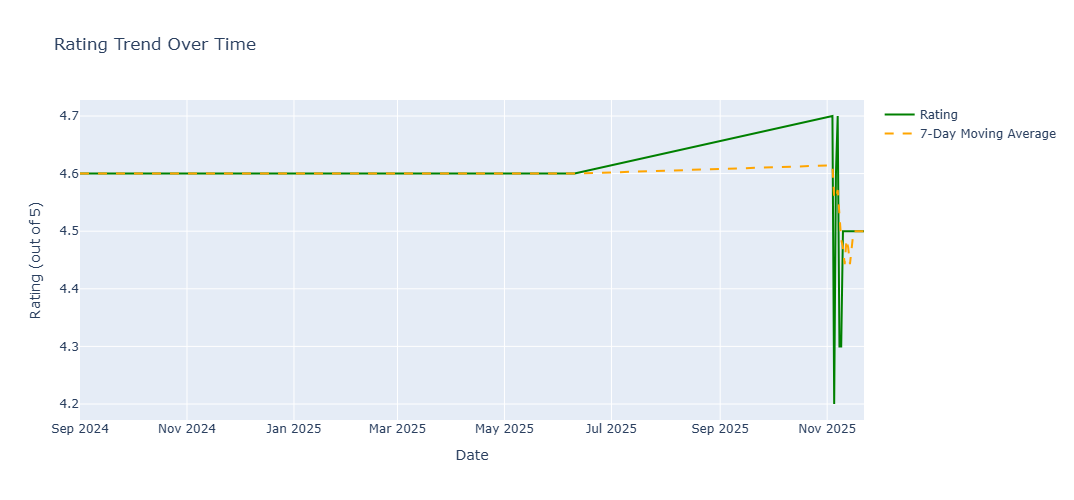

In [28]:
# Rating over time
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['rating'],
    mode='lines',
    name='Rating',
    line=dict(color='green', width=2)
))

# Add 7-day moving average
df['rating_ma7'] = df['rating'].rolling(window=7, min_periods=1).mean()

fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['rating_ma7'],
    mode='lines',
    name='7-Day Moving Average',
    line=dict(color='orange', width=2, dash='dash')
))

fig.update_layout(
    title='Rating Trend Over Time',
    xaxis_title='Date',
    yaxis_title='Rating (out of 5)',
    hovermode='x unified',
    height=500
)

fig.show()

In [ ]:
What I see:
    Mostly flat at 4.6
    Spike to 4.7 in Nov 2025 (This year)
    Then volatility (4.2-4.5 range)
    7-day moving average smooths noise

INFERENCE:
    Rating was very stable at 4.6 until November 2025, then became volatile (4.2-4.7 range).
    This recent variance may indicate quality control issues or marketplace changes worth investigating

## 5. OUTLIER DETECTION

In [29]:
# Outlier detection using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# Price outliers
price_outliers, price_lower, price_upper = detect_outliers(df, 'current_price')

print(f"\n🔍 Price Outliers:")
print(f"  Range: Rs.{price_lower:,.0f} - Rs.{price_upper:,.0f}")
print(f"  Outliers found: {len(price_outliers)} ({len(price_outliers)/len(df)*100:.1f}%)")

if len(price_outliers) > 0:
    print(f"\n  Sample outliers:")
    print(price_outliers[['date', 'current_price']].head())

# Rating outliers
rating_outliers, rating_lower, rating_upper = detect_outliers(df, 'rating')
print(f"\n🔍 Rating Outliers:")
print(f"  Range: {rating_lower:.2f} - {rating_upper:.2f}")
print(f"  Outliers found: {len(rating_outliers)} ({len(rating_outliers)/len(df)*100:.1f}%)")


🔍 Price Outliers:
  Range: Rs.47,648 - Rs.67,252
  Outliers found: 0 (0.0%)

🔍 Rating Outliers:
  Range: 4.60 - 4.60
  Outliers found: 18 (6.0%)


In [ ]:
What I see:
    Price outliers: 0 (0.0%)
    Rating outliers: 18 (6.0%)

INFERENCE:
    No unusual prices (no data errors or extreme flash sales in this dataset).
    But 6% of ratings are outliers (4.2, 4.7) - unusually low or high satisfaction on some days.

---

## SUMMARY

**This EDA was performed on the ACTUAL dataset used for price forecasting in our project.**

**Key Finding:** Data shows clear time-dependent patterns, justifying the use of Chronos and Prophet time series forecasting models.

**Workflow:**  
EDA (this notebook) → Model Selection (Chronos, Prophet) → Training (80/20 split) → Evaluation (MAPE, RMSE) → Dashboard Integration ✓

---

*Infosys Internship 6.0 - E-Commerce Competitor Strategy Tracker*